# Utilisation des scripts

Ce notebook vise à montrer l'utilisation des scripts du projet afin d'effectuer une inférence d'une image et d'une vidéo.

# Installation du projet `bfc` et accès aux données

Les login et mot de passe sont nécessaires pour accéder à des repos privés à partir de Google/Colab. Cela ne serait pas le cas en accès public.

In [1]:
import os
from getpass import getpass

In [2]:
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password

GitHub user··········
GitHub password··········


In [3]:
%%shell

git clone https://$GITHUB_AUTH@github.com/tibocour/IA.git

Cloning into 'IA'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 115 (delta 54), reused 86 (delta 27), pack-reused 0
Receiving objects: 100% (115/115), 71.69 MiB | 23.61 MiB/s, done.
Resolving deltas: 100% (54/54), done.


# Installation des dépendances

In [4]:
%%shell

pip install -r IA/requirements.txt

     |████████████████████████████████| 621 kB 4.2 MB/s 
     |████████████████████████████████| 6.3 MB 18.2 MB/s 
     |████████████████████████████████| 1.1 MB 55.0 MB/s 
     |████████████████████████████████| 636 kB 65.9 MB/s 
     |████████████████████████████████| 1.1 MB 47.3 MB/s 
     |████████████████████████████████| 3.4 MB 57.4 MB/s 
     |████████████████████████████████| 211 kB 51.6 MB/s 
     |████████████████████████████████| 120 kB 56.5 MB/s 
     |████████████████████████████████| 1.2 MB 48.0 MB/s 
     |████████████████████████████████| 87 kB 6.0 MB/s 
     |████████████████████████████████| 840 kB 66.8 MB/s 
     |████████████████████████████████| 25.3 MB 81 kB/s 
     |████████████████████████████████| 99 kB 9.3 MB/s 
     |████████████████████████████████| 352 kB 64.3 MB/s 
     |████████████████████████████████| 37.1 MB 38 kB/s 
     |████████████████████████████████| 1.1 MB 73.0 MB/s 
     |████████████████████████████████| 200 kB 63.2 MB/s 
  Created wheel for f

# Inférence d'une image

In [5]:
%%shell

rm -rf /tmp/images /tmp/annotations
unzip -q IA/data/valid_megots150images.zip -d /tmp

ls /tmp/images

1608644746.jpg	1608645649.jpg	1608646942.jpg	1608647303.jpg	1608647611.jpg
1608645146.jpg	1608645747.jpg	1608646972.jpg	1608647317.jpg	1608647715.jpg
1608645513.jpg	1608645788.jpg	1608646996.jpg	1608647434.jpg	1608647773.jpg
1608645529.jpg	1608645800.jpg	1608647099.jpg	1608647473.jpg	1608647849.jpg
1608645551.jpg	1608645936.jpg	1608647155.jpg	1608647544.jpg	1608648016.jpg
1608645605.jpg	1608646908.jpg	1608647288.jpg	1608647601.jpg	1608648090.jpg


In [6]:
%%shell

cd IA/python/google-coral-inference/

python detect_image.py \
  --model  /content/IA/data/efficientdet-lite-bfc.tflite \
  --labels /content/IA/data/bfc-labels.txt \
  --input  /tmp/images/1608644746.jpg \
  --output /content/1608644746_processed.jpg

----INFERENCE TIME----
Note: The first inference is slow because it includes loading the model into Edge TPU memory.
3029.35 ms
3027.69 ms
3014.00 ms
3024.42 ms
3031.91 ms
-------RESULTS--------
megot
  id:     0
  score:  0.9921875
  bbox:   BBox(xmin=248, ymin=104, xmax=396, ymax=289)


## Affichage de l'image de prédiction

In [7]:
from PIL import Image

In [8]:
im = Image.open("1608644746_processed.jpg")

In [9]:
import matplotlib.pyplot as plt

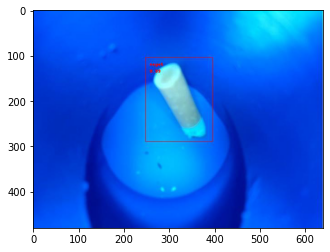

In [10]:
plt.imshow(im)
plt.show()

# Inférence d'une vidéo

In [11]:
%%shell

cd IA/python/google-coral-inference/

python detect_video.py \
  --model  /content/IA/data/efficientdet-lite-bfc.tflite \
  --labels /content/IA/data/bfc-labels.txt \
  --input  /content/IA/data/2megot.mp4 \
  --output /content/2megot_processed.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
inference time of the frame 0: 3030.933705 ms
	No objects detected in the frame 0
write the frame 0

inference time of the frame 1: 3031.248131 ms
	No objects detected in the frame 1
write the frame 1

inference time of the frame 2: 3004.098480 ms
	No objects detected in the frame 2
write the frame 2

inference time of the frame 3: 3025.358577 ms
	No objects detected in the frame 3
write the frame 3

inference time of the frame 4: 3016.593952 ms
	No objects detected in the frame 4
write the frame 4

inference time of the frame 5: 3018.479107 ms
	No objects detected in the frame 5
write the frame 5

inference time of the frame 6: 3034.967351 ms
	No objects detected in the frame 6
write the frame 6

inference time of the frame 7: 3001.463171 ms
	No objects detected in the frame 7
write the frame 7

inference time of the fram

## Affichage de la vidéo de prédiction

In [13]:
from IPython.display import HTML
from base64 import b64encode

In [14]:
# compress video
os.system(f"ffmpeg -i 2megot_processed.mp4 -vcodec libx264 compressed_2megot_processed.mp4")

# Show video
mp4 = open("compressed_2megot_processed.mp4",'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)